#### In this assignment, I'm going to extract data from twitter on the 3 presidential candidates (Peter Obi, Tinubu and Atiku), using their names as search string. With the aim of checking the candidate with the most polarity (positive tweets) between Jan 1st, 2022 to Nov 8th, 2022.

In [15]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [16]:
# pip install textblob

In [17]:
pip install nest-asyncio

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [18]:
import twint
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import glob
import os
from datetime import datetime
from textblob import TextBlob
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from sqlalchemy import create_engine


import nest_asyncio
nest_asyncio.apply() # I used this nest_asyncio to resolve this error "This event loop is already running"

In [23]:
# creating a search string 
candidates={"Bola Ahmed Tinubu": "Asiwaju\Tinubu\Jagaban", 
           "Peter Obi": "PO\Peter Obi\ObiDatti", 
           "Atiku": "Atiku"}

In [24]:
def twintConfig(search_string):
    c = twint.Config()
    c.Search = search_string[1]
    c.Limit=500
    c.Lang = 'en'
    c.Pandas = True
    c.Pandas_au = True          
    c.Pandas_clean=True
    c.Since='2022-01-01'
    c.Until='2022-10-08'
    twint.run.Search(c)

In [25]:
def Run_Twint(search_vals):
    
    #set empty dataframe for join
    out_df= pd.DataFrame()
    
    for candidates in search_vals.items():
        print ("running for search item: "+candidates[0]+"\n")
        print ("Search string: "+candidates[1]+"\n")
        
        #run twint
        twintConfig(candidates)
        
        #get dataframe
        candidates_2023 = twint.storage.panda.Tweets_df
        
        #join Dataframes and create 'candidates' column
        candidates_2023["candidates"]= candidates[0]
        out_df = pd.concat([out_df,candidates_2023])
        
    return out_df

In [26]:
# Extracting the tweets of the candidates from Jan 1st, 2022 till Nov 8th, 2022.
candidates_2023 = Run_Twint(candidates)

running for search item: Bola Ahmed Tinubu

Search string: Asiwaju\Tinubu\Jagaban

1578498427662766080 2022-10-07 22:32:06 +0100 <usmanzakkah15> @officialABAT Sir you are welcome back home, your enemies can only talk when you are not around but the moment you appears they all felt sick due to unwarranted hatred, they are suffering from hatremomiansis a sickness caused by hatred, Asiwaju Bola Ahmed Tinubu, The Jagaban of Africa,2023,
1578485971938856960 2022-10-07 21:42:37 +0100 <otoika> @DeeOneAyekooto Nigeria shall live, and it will live as a prosperous and peaceful nation. Asiwaju, Jagaban Bola Ahmed Tinubu to set, roll and implement the Marshall Plan of justice, peace and development. God bless Nigeria.  God bless Bola Ahmed Tinubu.
1578463404427456512 2022-10-07 20:12:56 +0100 <ndukaodo> Femi Fani-Kayode @realFFK hereby presents to you the real Asiwaju Bola Ahmed Tinubu (Jagaban)  Amaechi Fashola Peter Obi Anikulapo Benin Asaba Peter Gregory Obi Festus Keyamo Lagos State Anambra St

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
running for search item: Atiku

Search string: Atiku

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [81]:
candidates_2023

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidates
0,1589759942428602369,1589759942428602369,1.667863e+12,2022-11-08 00:21:21,+0100,,@officialABAT @ABATMediaCentre @Progressive4BA...,in,[],[],1.002899e+18,1002899374102413312,ABagadozi,Abubakar Sadiq Bagadozi,2.0,00,https://twitter.com/ABagadozi/status/158975994...,[],[https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg],1.0,https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg,False,0.0,1.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
1,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,@AjuriNgelale This man is too good. Tinubu-Sh...,en,[],[],1.509000e+18,1508999743048978437,Jagaban_Olu,Adekunle Olushola,2.0,00,https://twitter.com/Jagaban_Olu/status/1589759...,[],[],0.0,,False,0.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu
2,1589743505274204160,1589743505274204160,1.667859e+12,2022-11-07 23:16:02,+0100,,"Asiwaju Bola Ahmed Tinubu, APC Presidential ca...",en,[],[],1.535976e+18,1535976347398508546,JAGABAN_JAGABA,JAGABAN,1.0,23,https://twitter.com/JAGABAN_JAGABA/status/1589...,[],[https://pbs.twimg.com/media/Fg_nROiX0AELBwT.j...,1.0,https://pbs.twimg.com/media/Fg_nROiX0AELBwT.jpg,False,59.0,5.0,10.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
3,1589739556278259715,1589733681421512704,1.667858e+12,2022-11-07 23:00:20,+0100,,@nigeria1sth @officialABAT This is where Obi c...,en,[],[],8.044232e+17,804423211677024257,prestigeofficia,Dè Prestige🔥,1.0,23,https://twitter.com/prestigeofficia/status/158...,[],[],0.0,,False,19.0,15.0,4.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'nigeria1sth', 'name': '#2023...",,,,,Bola Ahmed Tinubu
4,1589719168466624512,1589529662916464642,1.667854e+12,2022-11-07 21:39:19,+0100,,@EmmyCoo52323626 @UchePOkoye It’s not about th...,en,[],[],1.267921e+18,1267920587911049216,mutiyat_yusuf,Ọláyínká Ẹ̀kúnrẹ́rẹ́,1.0,21,https://twitter.com/mutiyat_yusuf/status/15897...,[],[],0.0,,False,3.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'EmmyCoo52323626', 'name': 'V...",,,,,Bola Ahmed Tinubu
5,1589704394076930048,1589704394076930048,1.667850e+12,2022-11-07 20:40:37,+0100,,Asiwaju Bola Ahmed Tinubu (JAGABAN) https://t...,in,[],[],3.357082e+09,3357081813,Jenty_Of_Africa,JENTY,1.0,20,https://twitter.com/Jenty_Of_Africa/status/158...,[],[https://pbs.twimg.com/media/Fg_Dq2cXoAE89ed.j...,1.0,https://pbs.twimg.com/media/Fg_Dq2cXoAE89ed.jpg,False,0.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
6,1589698436051632129,1589698436051632129,1.667849e+12,2022-11-07 20:16:56,+0100,,They have turned it to “Tinubu is not speaking...,en,[],[],1.481720e+18,1481719534851702794,BolajiOyepoju,Bolaji Oyepoju,1.0,20,https://twitter.com/BolajiOyepoju/status/15896...,[],[],0.0,,False,50.0,4.0,20.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
7,1589696290216366082,1589696290216366082,1.667848e+12,2022-11-07 20:08:25,+0100,,*EGBEKINI WA OOOOOOOOO AWALOKAN OOOOOOOO ASIWA...,en,[],[],1.555349e+18,1555348702352621569,PrinceAdeAkeem1,king Akeem,1.0,20,https://twitter.com/PrinceAdeAkeem1/status/158...,[],[],1.0,https://pbs.twimg.com/ext_tw_video_thumb/15896...,False,1.0,0.0,1.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
8,1589683820336668672,1589641185853071361,1.667845e+12,2022-11-07 19:18:52,+0100,,"@Mr_JAGs Asiwaju Bola Ahmed Tinubu, a man that...",en,[],[],1.532679e+18,1532679116297752581,_BATified,Ekene,1.0,19,https://twitter.com/_BATified/status/158968382...,[],[],0.0,,False,1.0,1.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'Mr_JAGs', 'name': 'Jubril A....",,,,,Bola Ahmed Tinubu
9,1589681432200454144,1589597206436143105,1.667845e+12,2022-11-07 19:09:22

In [47]:
# Saving and exporting the dataset as csv
# candidates_2023.to_csv("C:/Users/STUTERN/Desktop/Intermediate_project/candidates_2023.csv") 

In [82]:
pd.set_option('display.max_columns', None) # used to display all the columns without hidding any

In [83]:
# checking the columns in the dataset
candidates_2023.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'candidates'],
      dtype='object')

In [84]:
candidates_2023.shape

(40, 39)

In [85]:
candidates_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 19
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               40 non-null     object 
 1   conversation_id  40 non-null     object 
 2   created_at       40 non-null     float64
 3   date             40 non-null     object 
 4   timezone         40 non-null     object 
 5   place            40 non-null     object 
 6   tweet            40 non-null     object 
 7   language         40 non-null     object 
 8   hashtags         40 non-null     object 
 9   cashtags         40 non-null     object 
 10  user_id          40 non-null     float64
 11  user_id_str      40 non-null     object 
 12  username         40 non-null     object 
 13  name             40 non-null     object 
 14  day              40 non-null     float64
 15  hour             40 non-null     object 
 16  link             40 non-null     object 
 17  urls             4

In [86]:
candidates_2023.head(3)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidates
0,1589759942428602369,1589759942428602369,1.667863e+12,2022-11-08 00:21:21,+0100,,@officialABAT @ABATMediaCentre @Progressive4BA...,in,[],[],1.002899e+18,1002899374102413312,ABagadozi,Abubakar Sadiq Bagadozi,2.0,00,https://twitter.com/ABagadozi/status/158975994...,[],[https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg],1.0,https://pbs.twimg.com/media/Fg_2PB3XkAE5nMZ.jpg,False,0.0,1.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu
1,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,@AjuriNgelale This man is too good. Tinubu-Sh...,en,[],[],1.509000e+18,1508999743048978437,Jagaban_Olu,Adekunle Olushola,2.0,00,https://twitter.com/Jagaban_Olu/status/1589759...,[],[],0.0,,False,0.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu
2,1589743505274204160,1589743505274204160,1.667859e+12,2022-11-07 23:16:02,+0100,,"Asiwaju Bola Ahmed Tinubu, APC Presidential ca...",en,[],[],1.535976e+18,1535976347398508546,JAGABAN_JAGABA,JAGABAN,1.0,23,https://twitter.com/JAGABAN_JAGABA/status/1589...,[],[https://pbs.twimg.com/media/Fg_nROiX0AELBwT.j...,1.0,https://pbs.twimg.com/media/Fg_nROiX0AELBwT.jpg,False,59.0,5.0,10.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu


In [87]:
candidates_2023["language"].unique() # checking if my data has other languages other than English

array(['in', 'en', 'qam', 'es'], dtype=object)

In [88]:
# Dropping other languages that are not English
candidates_2023 = candidates_2023[candidates_2023["language"].isin(['en'])]

In [89]:
candidates_2023["language"].unique() # confirming that other languages are dropped

array(['en'], dtype=object)

In [90]:
candidates_2023["tweet"][1]

1    @AjuriNgelale This man is too good.  Tinubu-Sh...
1    APC and PDP don’t really see each other as opp...
Name: tweet, dtype: object

In [91]:
# checking for dupicate rows
candidates_2023.duplicated(subset = "tweet", keep = 'first').sum() # we had about 139 duplicate rows

0

In [92]:
#Dropping the duplicated rows  
candidates_2023 = candidates_2023.drop_duplicates(subset=["tweet"],keep="first")

In [93]:
candidates_2023.shape # confirming if duplicates are dropped

(34, 39)

In [94]:
def clean_your_text(text): 
    pat1 = r'@[^ ]+'                   #@signs
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip() 

In [95]:
candidates_2023["tweet"] = candidates_2023["tweet"].apply(clean_your_text)

In [96]:
candidates_2023.shape

(34, 39)

In [97]:
candidates_2023["tweet"][1]

1    this man is too good  tinubushettima is the go...
1    apc and pdp dont really see each other as oppo...
Name: tweet, dtype: object

In [98]:
print("Running sentiment Analysis")

# creating two new columns(polarity and subjectivity)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

candidates_2023["Subjectivity"] = candidates_2023['tweet'].apply(getSubjectivity)
candidates_2023["Polarity"] = candidates_2023['tweet'].apply(getPolarity)

Running sentiment Analysis


In [99]:
candidates_2023[['Polarity','tweet']]

,Polarity,tweet
1,0.700000,this man is too good tinubushettima is the go...
2,0.000000,asiwaju bola ahmed tinubu apc presidential can...
3,0.500000,this is where obi can win i will vote for him ...
4,-0.100000,its not about the game for jagaban asiwaju tin...
6,-0.100000,they have turned it to tinubu is not speaking ...
7,0.357143,egbekini wa ooooooooo awalokan oooooooo asiwaj...
8,0.150000,asiwaju bola ahmed tinubu a man that knows his...
10,-0.033333,was actually their prime target yesterday but ...
11,0.500000,i love the neck pressing asiwaju bola ahmed ...
12,-0.094444,well if the national chairman of the main oppo...


In [100]:
candidates_2023[['Polarity','tweet']]['tweet'].iloc[0]

'this man is too good  tinubushettima is the goal may asiwaju and shettima succeed'

In [101]:
#creating a column to show if the tweet is positive, negative or neutral
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

candidates_2023['Analysis'] = candidates_2023['Polarity'].apply(analysis)

In [102]:
candidates_2023[['Polarity','tweet','Analysis', 'search']]

,Polarity,tweet,Analysis,search
1,0.700000,this man is too good tinubushettima is the go...,Positive,Asiwaju\Tinubu\Jagaban
2,0.000000,asiwaju bola ahmed tinubu apc presidential can...,Neutral,Asiwaju\Tinubu\Jagaban
3,0.500000,this is where obi can win i will vote for him ...,Positive,Asiwaju\Tinubu\Jagaban
4,-0.100000,its not about the game for jagaban asiwaju tin...,Negative,Asiwaju\Tinubu\Jagaban
6,-0.100000,they have turned it to tinubu is not speaking ...,Negative,Asiwaju\Tinubu\Jagaban
7,0.357143,egbekini wa ooooooooo awalokan oooooooo asiwaj...,Positive,Asiwaju\Tinubu\Jagaban
8,0.150000,asiwaju bola ahmed tinubu a man that knows his...,Positive,Asiwaju\Tinubu\Jagaban
10,-0.033333,was actually their prime target yesterday but ...,Negative,Asiwaju\Tinubu\Jagaban
11,0.500000,i love the neck pressing asiwaju bola ahmed ...,Positive,Asiwaju\Tinubu\Jagaban
12,-0.094444,well if the national chairman of the main oppo...,Negative,Asiwaju\Tinubu\Jagaban


In [103]:
candidates_2023["date"] = pd.to_datetime(candidates_2023["date"])

In [104]:
candidates_2023.head(3)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,candidates,Subjectivity,Polarity,Analysis
1,1589759791446241280,1589699071740383233,1.667863e+12,2022-11-08 00:20:45,+0100,,this man is too good tinubushettima is the go...,en,[],[],1.509000e+18,1508999743048978437,Jagaban_Olu,Adekunle Olushola,2.0,00,https://twitter.com/Jagaban_Olu/status/1589759...,[],[],0.0,,False,0.0,0.0,0.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'AjuriNgelale', 'name': 'Ajur...",,,,,Bola Ahmed Tinubu,0.60,0.7,Positive
2,1589743505274204160,1589743505274204160,1.667859e+12,2022-11-07 23:16:02,+0100,,asiwaju bola ahmed tinubu apc presidential can...,en,[],[],1.535976e+18,1535976347398508546,JAGABAN_JAGABA,JAGABAN,1.0,23,https://twitter.com/JAGABAN_JAGABA/status/1589...,[],[https://pbs.twimg.com/media/Fg_nROiX0AELBwT.j...,1.0,https://pbs.twimg.com/media/Fg_nROiX0AELBwT.jpg,False,59.0,5.0,10.0,,Asiwaju\Tinubu\Jagaban,,,,,,,[],,,,,Bola Ahmed Tinubu,0.00,0.0,Neutral
3,1589739556278259715,1589733681421512704,1.667858e+12,2022-11-07 23:00:20,+0100,,this is where obi can win i will vote for him ...,en,[],[],8.044232e+17,804423211677024257,prestigeofficia,Dè Prestige🔥,1.0,23,https://twitter.com/prestigeofficia/status/158...,[],[],0.0,,False,19.0,15.0,4.0,,Asiwaju\Tinubu\Jagaban,,,,,,,"[{'screen_name': 'nigeria1sth', 'name': '#2023...",,,,,Bola Ahmed Tinubu,0.35,0.5,Positive


In [105]:
# first get the mean of the candidates
candidates_2023.groupby(['search']).mean()

,created_at,user_id,day,video,nlikes,nreplies,nretweets,Subjectivity,Polarity
search,,,,,,,,,
Asiwaju\Tinubu\Jagaban,1.667838e+12,1.196348e+18,1.058824,0.352941,11.294118,1.470588,3.823529,0.340394,0.177095
PO\Peter Obi\ObiDatti,1.667543e+12,1.123402e+18,3.882353,0.176471,4.705882,0.000000,1.058824,0.380418,0.301330


In [106]:
df = candidates_2023[['search','Polarity','Analysis']]
df

,search,Polarity,Analysis
1,Asiwaju\Tinubu\Jagaban,0.700000,Positive
2,Asiwaju\Tinubu\Jagaban,0.000000,Neutral
3,Asiwaju\Tinubu\Jagaban,0.500000,Positive
4,Asiwaju\Tinubu\Jagaban,-0.100000,Negative
6,Asiwaju\Tinubu\Jagaban,-0.100000,Negative
7,Asiwaju\Tinubu\Jagaban,0.357143,Positive
8,Asiwaju\Tinubu\Jagaban,0.150000,Positive
10,Asiwaju\Tinubu\Jagaban,-0.033333,Negative
11,Asiwaju\Tinubu\Jagaban,0.500000,Positive
12,Asiwaju\Tinubu\Jagaban,-0.094444,Negative


In [107]:
# getting only positive tweets since the question is to get candidate with most positive comment
df1 = df[(df['Analysis']=='Positive')]
df1

,search,Polarity,Analysis
1,Asiwaju\Tinubu\Jagaban,0.700000,Positive
3,Asiwaju\Tinubu\Jagaban,0.500000,Positive
7,Asiwaju\Tinubu\Jagaban,0.357143,Positive
8,Asiwaju\Tinubu\Jagaban,0.150000,Positive
11,Asiwaju\Tinubu\Jagaban,0.500000,Positive
13,Asiwaju\Tinubu\Jagaban,0.143750,Positive
15,Asiwaju\Tinubu\Jagaban,0.300000,Positive
16,Asiwaju\Tinubu\Jagaban,0.400000,Positive
17,Asiwaju\Tinubu\Jagaban,0.143750,Positive
19,Asiwaju\Tinubu\Jagaban,0.143750,Positive


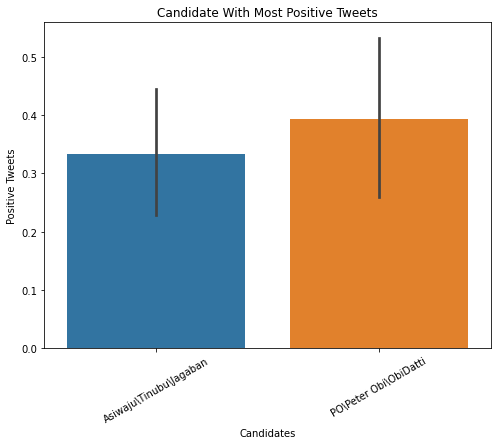

In [109]:
# plotting a barplot
fig = plt.figure(figsize =(8, 6))
plt.xticks(rotation=30)
sns.barplot(data=df1, x='search', y='Polarity').set(title='Candidate With Most Positive Tweets', 
                                                    xlabel ='Candidates', ylabel = 'Positive Tweets');

#### OBSERVATION
The analysis shows that Peter Obi has the most polarity (positive tweets) among the other political opponent. Followed by Tinubu and then Atiku.